# K means Clustering

K-means clustering is an unsupervised machine learning algorithm used for partitioning a dataset into distinct groups or clusters.
It aims to divide the data points into clusters in such a way that the points within each cluster are similar to each other, while points in different clusters are dissimilar.

It is widely used for tasks like data exploration, customer segmentation, and pattern recognition. By dividing the data into clusters, K-means helps uncover underlying structures and enables targeted strategies for businesses.

## Elbow Method
Elbow Method is used to define a number of cluster (K)

In [8]:
#Importing Required Libraries
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [9]:
#Importing Data
df=pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


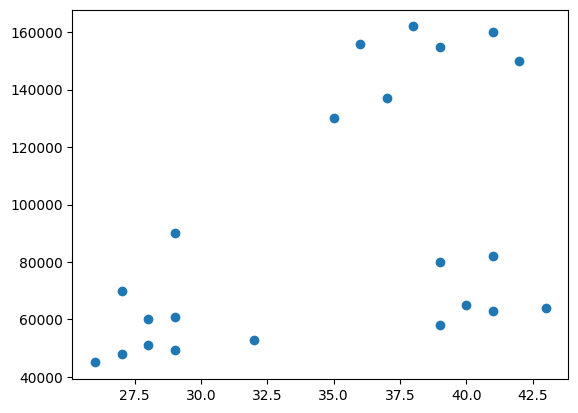

In [10]:
#Scatter plot of the data:

plt.scatter(df['Age'],df['Income($)'])

Model 

In [11]:
#K-means clustering:

# as above we can see that there is exactly 3 clusters
kmeans=KMeans(n_clusters=3)
kmeans

KMeans(n_clusters=3)

In [12]:
y_predicted=kmeans.fit_predict(df[['Age','Income($)']])
y_predicted

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [13]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [14]:
#Creating separate dataframes for each cluster:

df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df1.head()

,Name,Age,Income($),cluster
2,Mohan,29,61000,0
3,Ismail,28,60000,0
11,Tom,26,45000,0
12,Arnold,27,48000,0
13,Jared,28,51000,0


Text(0, 0.5, 'Income')

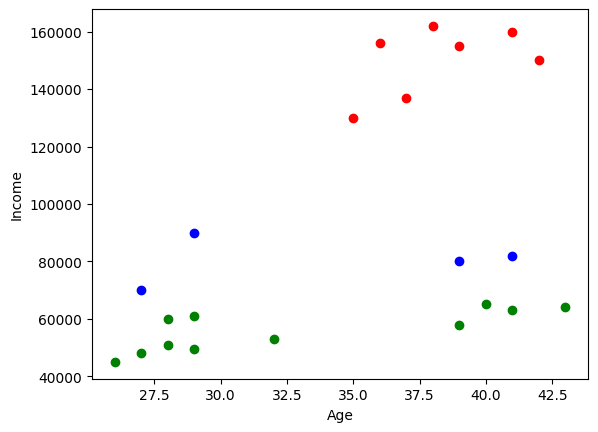

In [15]:
#Scatter plot of the clustered data:

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='blue')
plt.xlabel('Age')
plt.ylabel('Income')

In [16]:
#Scaling the features using Min-Max Scaler:

scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [17]:
#Reapplying K-means clustering on the scaled data:

km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [18]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [19]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [20]:
#Creating separate dataframes for each cluster on the scaled data:

df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df1.head()

,Name,Age,Income($),cluster
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0


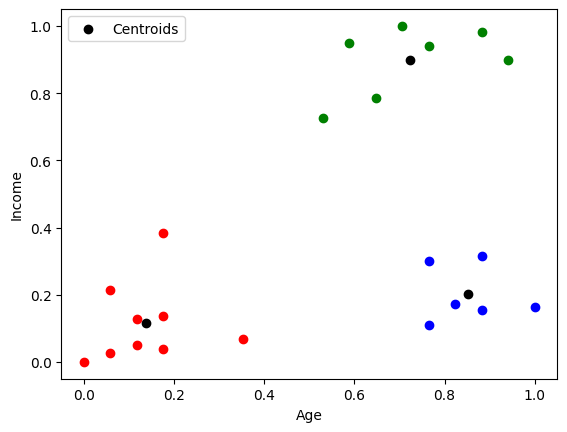

In [21]:
#Scatter plot of the clustered data on the scaled data:

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',label='Centroids')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [22]:
#Elbow method to determine the optimal number of clusters:

k_range=range(1,10)
sse=[]
for i in k_range:
    km=KMeans(n_clusters=i)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

In [23]:
sse

[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.34910470944195654,
 0.2621792762345213,
 0.21055478995472493,
 0.1685851223602976,
 0.13781880133764024,
 0.10188787724979426]

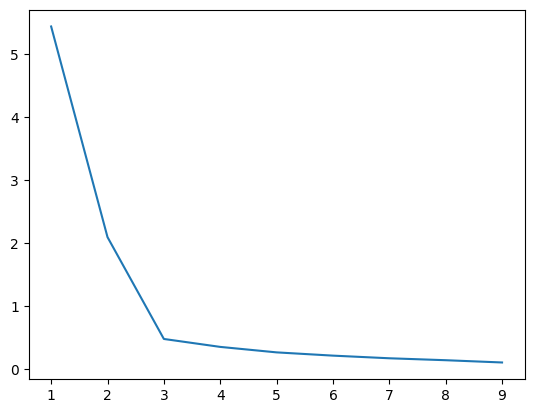

In [24]:
plt.plot(k_range,sse)